<a href="https://colab.research.google.com/github/ttvhh/CS114.K21/blob/master/Car_License_Plate_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automatic License Plate Recognition**

## **Phần I - Mô tả đồ án**

*   List item
*   List item



# **Phần II: Các bước thực hiện đồ án**

*   Bước 1: Chuẩn bị dữ liệu là các chữ số nhằm mục đích train cho model có thể nhận diện được các ký tự. Sau đó lưu ra file riêng.

*   Bước 2: Train model với dữ liệu đã có.

*   Bước 3: Đưa một file ảnh, trong đó là ảnh toàn cảnh của chiếc xe hoặc có thể là một phần chiếc xe (có bao gồm biển số xe cần nhận diện).

*   Bước 4: Để có thể tách biển số ra khỏi ảnh và thực hiện skew ảnh.

*   Bước 5: Thực hiện grayscale sau đó threshold để có thể phân tách trắng đen và đồng thời khử nhiễu càng nhiều càng tốt.

*   Bước 6: Tìm các contour trong ảnh sau khi đã được grayscale và threshold. Giữ các contour có khả năng cao là chữ số.

*   Bước 7: Nhận diện các contour được giữ lại bằng model đã qua quá trình training ở bước 2.

*   Bước 8: In ra các số liệu cần thiết và kết quả biển số nhận diện được ra màn hình.




In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!git clone https://github.com/ttvhh/CS114.K21

fatal: destination path 'CS114.K21' already exists and is not an empty directory.


Giải nén dataset

In [8]:
!unrar x "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data.rar" "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/CS114.K21/Automatic_License_Plate_Detection_SVM/data.rar

Creating    /content/CS114.K21/Automatic_License_Plate_Detection_SVM/data  OK
Creating    /content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0  OK
Extracting  /content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/1163.jpg       0%  OK 
Extracting  /content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/2575.0.jpg       0%  OK 
Extracting  /content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/4.jpg       0%  OK 
Extracting  /content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46304_5.jpg       0%  OK 
Extracting  /content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46314_8.jpg       0%  OK 
Extracting  /content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46325_6.jpg       0%  OK 
Extracting  /content/CS114.K21/Aut

In [9]:
!pip install -r /content/CS114.K21/Automatic_License_Plate_Detection_SVM/setup.txt

     |████████████████████████████████| 412.3MB 26kB/s 
     |████████████████████████████████| 3.8MB 39.6MB/s 
     |████████████████████████████████| 512kB 35.4MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.4-py2.py3-none-any.whl size=13431 sha256=d01decdc8ca15784a614a88b77500d1441bd455d5fdbead6cf8b65b42896a371
  Stored in directory: /root/.cache/pip/wheels/63/2a/a0/7596d2e0a73cf0aeffd6f6170862c4e73f3763b7827e48691a
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=d9ef38607446d3dbe47758041fcd7c613c77286b592222d7b9a3d6f746a4d1ba
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built pytesseract gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing insta

## **Phần III: Hiện thực đồ án**

### 1.   Chuẩn bị dữ liệu





In [11]:
import cv2
import os
import numpy as np
import glob

digit_w = 30
digit_h = 60

write_path="/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data"

def get_digit_data(path):#:, digit_list, label_list):

    digit_list = []
    label_list = []

    for number in range(10):
        i=0
        for img_org_path in glob.iglob(path + str(number) + '/*.jpg'):
            print(img_org_path)
            img = cv2.imread(img_org_path, 0)
            img = np.array(img)
            img = img.reshape(-1, digit_h * digit_w)

            print(img.shape)

            digit_list.append(img)
            label_list.append([int(number)])

    for number in range(65, 91):
        #number = chr(number)
        print(number)
        i=0
        for img_org_path in glob.iglob(path + str(number) + '/*.jpg'):
            print(img_org_path)
            img = cv2.imread(img_org_path, 0)
            img = np.array(img)
            img = img.reshape(-1, digit_h * digit_w)

            print(img.shape)

            digit_list.append(img)
            label_list.append([int(number)])

    return  digit_list, label_list

#lấy dữ liệu
digit_path = "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/"
digit_list, label_list = get_digit_data(digit_path)

digit_list = np.array(digit_list, dtype=np.float32)
digit_list = digit_list.reshape(-1, digit_h * digit_w)

label_list = np.array(label_list)
label_list = label_list.reshape(-1, 1)

svm_model = cv2.ml.SVM_create()
svm_model.setType(cv2.ml.SVM_C_SVC)
svm_model.setKernel(cv2.ml.SVM_INTER)
svm_model.setTermCriteria((cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-6))
svm_model.train(digit_list, cv2.ml.ROW_SAMPLE, label_list)

svm_model.save("svm.xml")


#BATCH_SIZE = 64

#my_checkpointer = [
#                EarlyStopping(monitor='val_loss', patience=5, verbose=0),
#                ModelCheckpoint(filepath="License_character_recognition.h5", verbose=1, save_weights_only=True)
#               ]

#result = model.fit(image_gen.flow(trainX, trainY, batch_size=BATCH_SIZE), 
 #                  steps_per_epoch=len(trainX) // BATCH_SIZE, 
 #                  validation_data=(testX, testY), 
 #                  validation_steps=len(testX) // BATCH_SIZE, 
 #                  epochs=EPOCHS, callbacks=my_checkpointer)

/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46513_8.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/9221.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46631_7.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46610_4.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/47015_5.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46304_5.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46937_7.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46378_2.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46848_1.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46574_4.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/data/0/46314_8.jpg
(1, 1800)
/content/CS114.K21/Automatic_License_Plate_Detection_SVM/

In [12]:
# pylint: disable=invalid-name, redefined-outer-name, missing-docstring, non-parent-init-called, trailing-whitespace, line-too-long
from os.path import splitext
import cv2
import numpy as np
from keras.models import model_from_json


class Label:
    def __init__(self, cl=-1, tl=np.array([0., 0.]), br=np.array([0., 0.]), prob=None):
        self.__tl = tl
        self.__br = br
        self.__cl = cl
        self.__prob = prob

    def __str__(self):
        return 'Class: %d, top left(x: %f, y: %f), bottom right(x: %f, y: %f)' % (
        self.__cl, self.__tl[0], self.__tl[1], self.__br[0], self.__br[1])

    def copy(self):
        return Label(self.__cl, self.__tl, self.__br)

    def wh(self): return self.__br - self.__tl

    def cc(self): return self.__tl + self.wh() / 2

    def tl(self): return self.__tl

    def br(self): return self.__br

    def tr(self): return np.array([self.__br[0], self.__tl[1]])

    def bl(self): return np.array([self.__tl[0], self.__br[1]])

    def cl(self): return self.__cl

    def area(self): return np.prod(self.wh())

    def prob(self): return self.__prob

    def set_class(self, cl):
        self.__cl = cl

    def set_tl(self, tl):
        self.__tl = tl

    def set_br(self, br):
        self.__br = br

    def set_wh(self, wh):
        cc = self.cc()
        self.__tl = cc - .5 * wh
        self.__br = cc + .5 * wh

    def set_prob(self, prob):
        self.__prob = prob

class DLabel(Label):
    def __init__(self, cl, pts, prob):
        self.pts = pts
        tl = np.amin(pts, axis=1)
        br = np.amax(pts, axis=1)
        Label.__init__(self, cl, tl, br, prob)

# Hàm normalize ảnh
def im2single(Image):
    return Image.astype('float32') / 255

def getWH(shape):
    return np.array(shape[1::-1]).astype(float)

def IOU(tl1, br1, tl2, br2):
    wh1, wh2 = br1-tl1, br2-tl2
    assert((wh1 >= 0).all() and (wh2 >= 0).all())
    
    intersection_wh = np.maximum(np.minimum(br1, br2) - np.maximum(tl1, tl2), 0)
    intersection_area = np.prod(intersection_wh)
    area1, area2 = (np.prod(wh1), np.prod(wh2))
    union_area = area1 + area2 - intersection_area
    return intersection_area/union_area

def IOU_labels(l1, l2):
    return IOU(l1.tl(), l1.br(), l2.tl(), l2.br())

def nms(Labels, iou_threshold=0.5):
    SelectedLabels = []
    Labels.sort(key=lambda l: l.prob(), reverse=True)
    
    for label in Labels:
        non_overlap = True
        for sel_label in SelectedLabels:
            if IOU_labels(label, sel_label) > iou_threshold:
                non_overlap = False
                break

        if non_overlap:
            SelectedLabels.append(label)
    return SelectedLabels

def load_model(path):
    path = splitext(path)[0]
    with open('%s.json' % path, 'r') as json_file:
        model_json = json_file.read()
    model = model_from_json(model_json, custom_objects={})
    model.load_weights('%s.h5' % path)
    return model

def find_T_matrix(pts, t_pts):
    A = np.zeros((8, 9))
    for i in range(0, 4):
        xi = pts[:, i]
        xil = t_pts[:, i]
        xi = xi.T
        
        A[i*2, 3:6] = -xil[2]*xi
        A[i*2, 6:] = xil[1]*xi
        A[i*2+1, :3] = xil[2]*xi
        A[i*2+1, 6:] = -xil[0]*xi

    [U, S, V] = np.linalg.svd(A)
    H = V[-1, :].reshape((3, 3))
    return H

def getRectPts(tlx, tly, brx, bry):
    return np.matrix([[tlx, brx, brx, tlx], [tly, tly, bry, bry], [1, 1, 1, 1]], dtype=float)

def normal(pts, side, mn, MN):
    pts_MN_center_mn = pts * side
    pts_MN = pts_MN_center_mn + mn.reshape((2, 1))
    pts_prop = pts_MN / MN.reshape((2, 1))
    return pts_prop

# Hàm tái tạo từ predict value thành biến số, cắt từ ảnh chính ra biển số,  nhãn...
def reconstruct(I, Iresized, Yr, lp_threshold):
    # 4 max-pooling layers, stride = 2
    net_stride = 2**4
    side = ((208 + 40)/2)/net_stride

    # one line and two lines license plate size
    one_line = (470, 110)
    two_lines = (280, 200)

    Probs = Yr[..., 0]
    Affines = Yr[..., 2:]

    xx, yy = np.where(Probs > lp_threshold)
    # CNN input image size 
    WH = getWH(Iresized.shape)
    # output feature map size
    MN = WH/net_stride

    vxx = vyy = 0.5 #alpha
    base = lambda vx, vy: np.matrix([[-vx, -vy, 1], [vx, -vy, 1], [vx, vy, 1], [-vx, vy, 1]]).T
    labels = []
    labels_frontal = []

    for i in range(len(xx)):
        x, y = xx[i], yy[i]
        affine = Affines[x, y]
        prob = Probs[x, y]

        mn = np.array([float(y) + 0.5, float(x) + 0.5])

        # affine transformation matrix
        A = np.reshape(affine, (2, 3))
        A[0, 0] = max(A[0, 0], 0)
        A[1, 1] = max(A[1, 1], 0)
        # identity transformation
        B = np.zeros((2, 3))
        B[0, 0] = max(A[0, 0], 0)
        B[1, 1] = max(A[1, 1], 0)

        pts = np.array(A*base(vxx, vyy))
        pts_frontal = np.array(B*base(vxx, vyy))

        pts_prop = normal(pts, side, mn, MN)
        frontal = normal(pts_frontal, side, mn, MN)

        labels.append(DLabel(0, pts_prop, prob))
        labels_frontal.append(DLabel(0, frontal, prob))

    final_labels = nms(labels, 0.1)
    final_labels_frontal = nms(labels_frontal, 0.1)

    print(final_labels_frontal)


    # LP size and type
    out_size, lp_type = (two_lines, 2) if ((final_labels_frontal[0].wh()[0] / final_labels_frontal[0].wh()[1]) < 1.7) else (one_line, 1)

    TLp = []
    if len(final_labels):
        final_labels.sort(key=lambda x: x.prob(), reverse=True)
        for _, label in enumerate(final_labels):
            t_ptsh = getRectPts(0, 0, out_size[0], out_size[1])
            ptsh = np.concatenate((label.pts * getWH(I.shape).reshape((2, 1)), np.ones((1, 4))))
            H = find_T_matrix(ptsh, t_ptsh)

            Ilp = cv2.warpPerspective(I, H, out_size, borderValue=0)
            TLp.append(Ilp)
    print(final_labels)
    return final_labels, TLp, lp_type

def detect_lp(model, I, max_dim, lp_threshold):

    # Tính factor resize ảnh
    min_dim_img = min(I.shape[:2])
    factor = float(max_dim) / min_dim_img

    # Tính W và H mới sau khi resize
    w, h = (np.array(I.shape[1::-1], dtype=float) * factor).astype(int).tolist()

    # Tiến hành resize ảnh
    Iresized = cv2.resize(I, (w, h))

    T = Iresized.copy()

    # Chuyển thành Tensor
    T = T.reshape((1, T.shape[0], T.shape[1], T.shape[2]))

    # Tiến hành detect biển số bằng Wpod-net pretrain
    Yr = model.predict(T)

    # Remove các chiều =1 của Yr
    Yr = np.squeeze(Yr)

    print(Yr.shape)

    # Tái tạo và trả về các biến gồm: Nhãn, Ảnh biến số, Loại biển số (1: dài: 2 vuông)
    L, TLp, lp_type = reconstruct(I, Iresized, Yr, lp_threshold)

    return L, TLp, lp_type

Using TensorFlow backend.


### **2. Xử lý biển số**

*   Load ảnh
*   Tách biển số bằng WPOD
*   Grayscale, threshold và khử nhiễu
*   Tìm contour



#### 2.1 Load ảnh


#### 2.2 Tách biển số

Sử dụng WPOD để thực hiện công việc tách biển số ra từ tấm hình đầu vào

#### 2.3 Grayscale

Trong xử lý ảnh, việc chuyển đổi ảnh màu sang ảnh xám là công việc vô cùng phổ biến. Ảnh màu thực chất là tập hợp của nhiều ma trận có cùng kích thước.

Công việc xử lý thông tin trên ảnh sẽ trở nên dễ dàng hơn nếu ta chỉ cần xử lý dữ liệu trên một ma trận số thay vì nhiều ma trận số. 

Do đó, việc biến đổi ảnh màu về ảnh số (Grayscale Conversion) chính là biến đổi thông tin ảnh về một ma trận số hai chiều duy nhất

Hiện thực: sử dụng câu lệnh 
> ``` cvtColor(source, dest, mode) ```

*   ```source``` : ảnh màu gốc
*   ```dest``` : ảnh xám đã chuyển đổi
*   ```mode``` : độ chuyển đổi màu
*   Ở đây, ta dùng chế độ ```CV_BGR2GRAY``` để chuyển từ ảnh mày từ format RGB (Red - Green - Blue) sang ảnh xám (Gray)






#### 2.4 Inverted Threshold Binary

##### 2.4.1 Mục đích

 Ảnh đen trắng thường được ứng dụng trong bài toán phân vùng ảnh (Image Segmentation).

##### 2.4.2 Cách thức

Ảnh đen trắng chỉ có hai màu là màu đen với giá trị là ```0``` và màu trắng với giá trị là ```255```. Do đó ta phải tìm cách biến đổi ảnh xám đã được chuyển đổi ở bước trên (hay là một ma trận 2 chiều với mỗi ô

#### 2.4 Tìm Contours

Duyệt hết các contour từ trái sang phải, đồng thời kiểm tra các bounding box của các contour đó. Nếu có 1 tỉ lệ nhất định giữa hai giá trị width và height của contour đó thì đấy chính là số.

Đối với đồ án, chọn các contour có giá trị height từ 60% giá trị height của biển số.

Sau khi xử lý các contours ở trên, trích xuất các giá trị cần thiết và đưa vào model SVM đã thực hiện công hiện predict đó là chữ số nào.

Cuối cùng chính là ghép cả chuỗi số lại rồi hiển thị ra màn hình giá trị của biển số.

Xử lý ảnh

Truóc khi bắt đầu, ta cần áp dụng một số kỹ thuật xử lý để giảm nhiễu (noise) và làm nổi bật các đặc trưng chính (key features) của các ký tự cần nhận dạng. Ở đây sẽ dùng 1 tấm hình bất kì có chứa biển số xe để làm mẫu.

Quá trình này sẽ hiện thực một số kĩ thuật sau:
1. 255-scale Conversion: hình ảnh được giải nén từ
2. Grayscale Conversion: 
3. Blurring
4. Image Thresholding

Convert to 255 scale. Extracted license image from Wpod-Net is interpreted as 0–1 scale, thus we need to convert it to 8-bit scale as standard image.

Convert to grayscale. Color plays an negligible role to understand the license plate, thus we can remove it to optimize computational power.

Blur image. Blur technique is performed to remove noise and irrelevant information. In the example code, I used Gaussian Blur with kernel size of (7,7) but this value can be tuned depending on your image. The higher of the kernel size, the less noise but more information is lost.

Image thresholding. We set a threshold so that any smaller pixel value than it would be converted to 255 and vice versa. This type of thresholding is called inverse binary thresholding . In the example code, I used threshold value of 180, this value can be modified to be more compatible with your image.

Dilation. This is a technique to increase the white region of the image. By implementing dilation, we want to enhance the white contour of each character,

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


(24, 32, 8)
Bien so= 68A03531


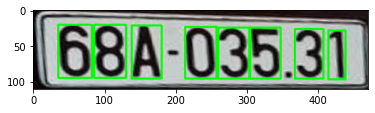

In [14]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from lib_detection.py import load_model, detect_lp, im2single


# Ham sap xep contour tu trai sang phai
def sort_contours(cnts):

    reverse = False
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

# Dinh nghia cac ky tu tren bien so
char_list =  '0123456789ABCDEFGHKLMNPRSTUVXYZ'

# Ham fine tune bien so, loai bo cac ki tu khong hop ly
def fine_tune(lp):
    newString = ""
    for i in range(len(lp)):
        if lp[i] in char_list:
            newString += lp[i]
    return newString

# Đường dẫn ảnh, các bạn đổi tên file tại đây để thử nhé
img_path = "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/test/test.jpg"

# Load model LP detection
wpod_net_path = "/content/CS114.K21/Automatic_License_Plate_Detection_SVM/wpod-net_update1.json"
wpod_net = load_model(wpod_net_path)

# Đọc file ảnh đầu vào
Ivehicle = cv2.imread(img_path)

# Kích thước lớn nhất và nhỏ nhất của 1 chiều ảnh
Dmax = 608
Dmin = 288

# Lấy tỷ lệ giữa W và H của ảnh và tìm ra chiều nhỏ nhất
ratio = float(max(Ivehicle.shape[:2])) / min(Ivehicle.shape[:2])
side = int(ratio * Dmin)
bound_dim = min(side, Dmax)

_ , LpImg, lp_type = detect_lp(wpod_net, im2single(Ivehicle), bound_dim, lp_threshold=0.5)


# Cau hinh tham so cho model SVM
digit_w = 30 # Kich thuoc ki tu
digit_h = 60 # Kich thuoc ki tu

model_svm = cv2.ml.SVM_load('/content/CS114.K21/Automatic_License_Plate_Detection_SVM/svm.xml')

if (len(LpImg)):

    # Chuyen doi anh bien so / Scales, calculates absolute values and then converts the result to 8-bit
    LpImg[0] = cv2.convertScaleAbs(LpImg[0], alpha=(255.0))

    roi = LpImg[0]

    # Chuyen anh bien so ve gray / Apply grayscale conversion and blue the image
    gray = cv2.cvtColor( LpImg[0], cv2.COLOR_BGR2GRAY)


    # Ap dung threshold de phan tach so va nen / Apply the inversed thresh binary
    binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)[1]

    plt.imshow(binary)
    #cv2.imshow("Anh bien so sau threshold", binary)
    #cv2.waitKey()

    # Segment kí tự / Apply dilation
    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)
    cont, _  = cv2.findContours(thre_mor, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


    plate_info = ""

    for c in sort_contours(cont):
        (x, y, w, h) = cv2.boundingRect(c)
        ratio = h/w
        if 1.5<=ratio<=3.5: # Chon cac contour dam bao ve ratio w/h
            if h/roi.shape[0]>=0.6: # Chon cac contour cao tu 60% bien so tro len

                # Ve khung chu nhat quanh so
                cv2.rectangle(roi, (x, y), (x + w, y + h), (0, 255, 0), 2)

                # Tach so va predict
                curr_num = thre_mor[y:y+h,x:x+w]
                curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
                
                # Ap dung ROI 
                _, curr_num = cv2.threshold(curr_num, 30, 255, cv2.THRESH_BINARY)
                curr_num = np.array(curr_num,dtype=np.float32)
                curr_num = curr_num.reshape(-1, digit_w * digit_h)

                # Dua vao model SVM
                result = model_svm.predict(curr_num)[1]
                result = int(result[0, 0])

                if result<=9: # Neu la so thi hien thi luon
                    result = str(result)
                else: #Neu la chu thi chuyen bang ASCII
                    result = chr(result)

                plate_info +=result

    plt.imshow(roi)
    #cv2.imshow("Cac contour tim duoc", roi)
    #cv2.waitKey()

    # Viet bien so len anh
    cv2.putText(Ivehicle,fine_tune(plate_info),(50, 50), cv2.FONT_HERSHEY_PLAIN, 3.0, (0, 0, 255), lineType=cv2.LINE_AA)

    # Hien thi anh
    print("Bien so=", plate_info)
    #plt.imshow(Ivehicle)
    #cv2.imshow("Hinh anh output",Ivehicle)
    #cv2.waitKey()

#cv2.destroyAllWindows()

### **3. Hiển thị**